# Predictive Modeling for Business Forecasting¶
  28 February 2024

# Load the dataset and perform data preprocessing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [5]:
distress = pd.read_csv('Financial Distress.csv')

In [6]:
distress.head(10)

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.28100,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.27000,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.05290,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.11310,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.06230,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27
5,2,2,0.007188,1.05580,0.081916,0.87949,0.68673,0.142630,0.043102,0.77198,...,107.090,31.31,30.194,17.000,16.0,0.4,29,1.357300,8,28
6,2,3,1.200200,0.97059,0.076064,0.90677,0.80980,0.165920,-0.024649,0.73660,...,120.870,36.07,35.273,17.000,15.0,-0.2,29,0.007188,9,29
7,2,4,2.234800,1.05900,0.130200,0.81811,0.87599,0.234450,0.045576,0.78727,...,54.806,39.80,38.377,17.167,16.0,5.6,29,1.200200,10,30
8,2,5,1.340500,1.12450,0.147840,0.75871,1.07990,0.276440,0.089408,0.80356,...,59.806,44.53,42.822,15.500,14.0,2.1,29,2.234800,11,31
9,2,6,2.047400,1.59980,0.262460,0.54615,1.31270,0.369480,0.296640,0.85364,...,66.262,52.74,49.206,15.500,12.0,-6.4,29,1.340500,12,32


In [7]:
# Missing values
print(distress.isnull().sum())

Company               0
Time                  0
Financial Distress    0
x1                    0
x2                    0
                     ..
x79                   0
x80                   0
x81                   0
x82                   0
x83                   0
Length: 86, dtype: int64


# Feature Selection and Engineering

In [8]:
# Correlation matrix to identify highly correlated features
correlation_matrix = distress.corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
distress.drop(to_drop, axis=1, inplace=True)

In [9]:
# Define features and target variable
x = distress.drop(columns=['Financial Distress'])
y = distress['Financial Distress']

In [10]:
# Handle missing values: impute with the mean of each column
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

In [11]:
# Feature Engineering: Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x_imputed)

In [12]:
# Create additional time-related features
distress['month'] = pd.to_datetime(distress['Time']).dt.month
distress['day'] = pd.to_datetime(distress['Time']).dt.day
distress['hour'] = pd.to_datetime(distress['Time']).dt.hour
distress['x1_lag1'] = distress['x1'].shift(1)

# Model Selection

In [13]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

In [14]:
# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

In [15]:
# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42)
}

In [ ]:
# Evaluate models
for name, model in models.items():
    model.fit(x_train_imputed, y_train)
    y_predict = model.predict(x_test_imputed)
    mse = mean_squared_error(y_test, y_predict)
    print(f"{name}: Mean Squared Error = {mse:.2f}")

#  Model Evaluation

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

In [ ]:
# Model Definition
model = RandomForestRegressor(random_state=42)

In [ ]:
# Model Training
model.fit(x_train_imputed, y_train)

In [43]:
# Predictions on tested data
y_prediction = model.predict(x_test_imputed)

In [44]:
# Evaluate model: MSE
mse = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error: {mse: .2f}")

Mean Squared Error:  390699680949325.50


# # Predictive Insights

In [45]:
# Get feature importance from the Random Forest model
feature_importance = model.feature_importances_

In [46]:
# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

In [47]:
# Print feature names and their importance scores
for i in sorted_idx:
    print(f"{x.columns[i]}: {feature_importance[i]}")

x48: 0.3090087194062596
x41: 0.163136481522076
x25: 0.14561107025407827
x10: 0.04382329461971983
x73: 0.017246554441904243
x19: 0.015594210974306778
x9: 0.015144994870977339
x83: 0.010487358954927717
x3: 0.00891042212655669
x28: 0.008371355916789953
x14: 0.007770702679828272
x47: 0.007670687128422793
x30: 0.007654078740588396
x58: 0.007427739314997659
x39: 0.007114408382947107
x59: 0.007058183524293813
x22: 0.006987261700509246
x21: 0.0068025684156600204
x32: 0.006608977269191928
x68: 0.006439945229182956
x20: 0.0062812419490220605
x24: 0.0061139003514323
x54: 0.006013698947933399
x36: 0.005988819716260606
x46: 0.005668338677229048
x66: 0.005658450546249864
x16: 0.005499047953228381
x40: 0.00527019042111605
x12: 0.005175151527174476
x45: 0.005141277201464576
x18: 0.005139162472876233
x71: 0.004953625676704989
x61: 0.004786823114997776
x55: 0.004723718066318178
x37: 0.004660609151906636
x57: 0.004633516060501674
x79: 0.004587664183173071
x63: 0.004247660829974798
x5: 0.00394658165393465

In [48]:
# Calculate residuals and identify instances with high prediction errors
residuals = y_test - y_predict
high_error_indices = np.argsort(np.abs(residuals))[::-1][:10]

In [50]:
# Print feature values and their corresponding actual and predicted values for high-error instances
for idx in high_error_indices:
    if idx < len(y_test) and idx < len(x_test):
        print(f"Instance {idx}:")
        print(f"Actual Value: {y_test.iloc[idx]}")
        print(f"Predicted Value: {y_predict[idx]}")
        print(f"Features: {x_test.iloc[idx]}")
    else:
        print(f"Index {idx} is out of bounds.")

Instance 70:
Actual Value: 0.1071
Predicted Value: 535876694.5749765
Features: Company    166.000000
Time        11.000000
x1           4.723200
x2          -0.005157
x3           0.179180
              ...    
x78         14.500000
x79        -16.000000
x80         11.000000
x82         38.000000
x83         51.000000
Name: 1818, Length: 77, dtype: float64
Instance 559:
Actual Value: 0.86913
Predicted Value: -655403.5596035722
Features: Company    72.000000
Time       14.000000
x1          0.674250
x2          0.067254
x3          0.567280
             ...    
x78        20.500000
x79         8.600000
x80        15.000000
x82        21.000000
x83        42.000000
Name: 817, Length: 77, dtype: float64
Instance 360:
Actual Value: -0.038909
Predicted Value: -65189.066170881095
Features: Company    303.000000
Time        11.000000
x1           0.289180
x2          -0.011979
x3           0.419690
              ...    
x78         14.500000
x79        -16.000000
x80         15.000000
x82   

In [51]:
# Calculate residuals
residuals = y_test - y_predict

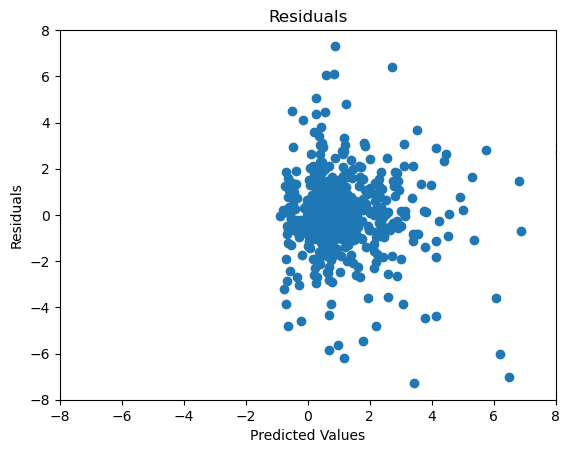

In [57]:
# Scatter plot
plt.scatter(y_predict, residuals)
plt.title('Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()